### Lab 4 - PRAMOD KUNJUKUNJU SAJI - 8856432

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

##### 1. Use the code provided below to get the data, and run the train-test split. Description of each column can be found in sklearn documentation. Look at the documentation for the load_diabetes method to know what are as_frame and scaled for.

In [2]:
# Import the Diabetes dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

X_train = pd.DataFrame(X_train)

##### 2. Run a multivariate linear regression on all variables

In [3]:
# Create linear regression model
linearModel = LinearRegression()

# Fit the training model
linearModel.fit(X_train, y_train)

LinearRegression()

In [4]:
# Linear model coefficient
linearModel.coef_

array([-1.61754419e-01, -1.89061286e+01,  6.32275663e+00,  1.21383487e+00,
       -1.58591244e+00,  1.27541808e+00,  6.91816236e-01,  4.46900462e+00,
        7.95467333e+01,  6.76026227e-02])

In [5]:
# Linear model intercept
linearModel.intercept_

-366.5913458749576

In [6]:
# Predicting the train and test values
y_linear_pred_test = linearModel.predict(X_test)
y_linear_pred_train = linearModel.predict(X_train)

##### 3. Run a multivariate polynomial regression of the 2nd degree on all variable (Hint: set include_bias=False in PolynomialFeatures)

In [7]:
# Create polynomial regression model
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
poly_features

PolynomialFeatures(include_bias=False)

In [8]:
# Create new features
X_poly_test = poly_features.fit_transform(X_test)
X_poly_train = poly_features.fit_transform(X_train)

In [9]:
# Create a linear regression with independent variables
poly_reg_model = LinearRegression()

# Fit the poly_model with training data with polynomial features
poly_reg_model.fit(X_poly_train, y_train)

LinearRegression()

In [10]:
# Find the coefficients and Intercept of poly_reg_model

print('The co-efficients of poly_reg_model are: ',poly_reg_model.coef_)
print('The co-efficients of poly_reg_model is: ',poly_reg_model.intercept_)

The co-efficients of poly_reg_model are:  [-6.70602521e+00 -2.50169446e+01 -3.34028792e+01 -4.65524344e-01
 -4.30541749e+01  5.25213444e+01  2.46423955e+01 -2.43341782e+02
 -2.32670666e+03 -3.44027640e+00  1.61916000e-03  1.09868393e+00
 -2.71215492e-02  8.14630441e-03  3.48730969e-02 -6.05857626e-02
  3.72466771e-02  9.07456701e-01 -9.75448989e-02  4.43322983e-03
 -7.50508344e+01  7.15534071e-01  5.51986130e-01 -8.04121131e-01
  1.29745484e+00  1.85813090e-01 -2.96178475e+01  3.82329607e+01
  4.13379166e-01  1.21261419e-01  8.38308391e-02 -1.03434877e-01
  8.15596778e-02  1.90512551e-01  2.39596281e-01  2.71691924e+00
  1.29711200e-01  2.53270599e-03  1.51753196e-02 -5.19664205e-03
  3.68190140e-03  1.02028055e-01 -3.69733458e-01 -3.61765458e-02
  2.00050948e-01 -3.20109065e-01 -4.56336581e-01 -1.51519756e+00
 -2.04790944e+00  3.97691887e-02  1.31712996e-01  3.30426565e-01
  6.19891710e-01  6.36945209e-01 -5.55165970e-02  2.88473729e-01
  2.53324621e+00  2.32532799e+00  4.75248351e-02

In [11]:
# Predict values using polynomial regression model
y_pred_poly_test = poly_reg_model.predict(X_poly_test)
y_pred_poly_train = poly_reg_model.predict(X_poly_train)

##### 4. Compare the two models by looking at MAE and MAPE using the provided function

In [12]:
def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')
    print(f'Train Dataset: Mean Squared Error: {mean_squared_error(y_train, y_pred_train):.2f}')
    print(f'Train Dataset: Mean Absolute Percentage Error: {mean_squared_error(y_train, y_pred_train):.2f}')
    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Test Dataset: Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.2f}')
    print(f'Test Dataset: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_test):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

Train Dataset: Mean Absolute Error: 42.53
Train Dataset: Mean Squared Error: 2759.79
Train Dataset: Mean Absolute Percentage Error: 2759.79
Test Dataset: Mean Absolute Error: 46.29
Test Dataset: Mean Squared Error: 3213.23
Test Dataset: Mean Absolute Percentage Error: 0.46
y = -0.16 * x_0 + -18.91 * x_1 + 6.32 * x_2 + 1.21 * x_3 + -1.59 * x_4 + 1.28 * x_5 + 0.69 * x_6 + 4.47 * x_7 + 79.55 * x_8 + 0.07 * x_9 + -366.59


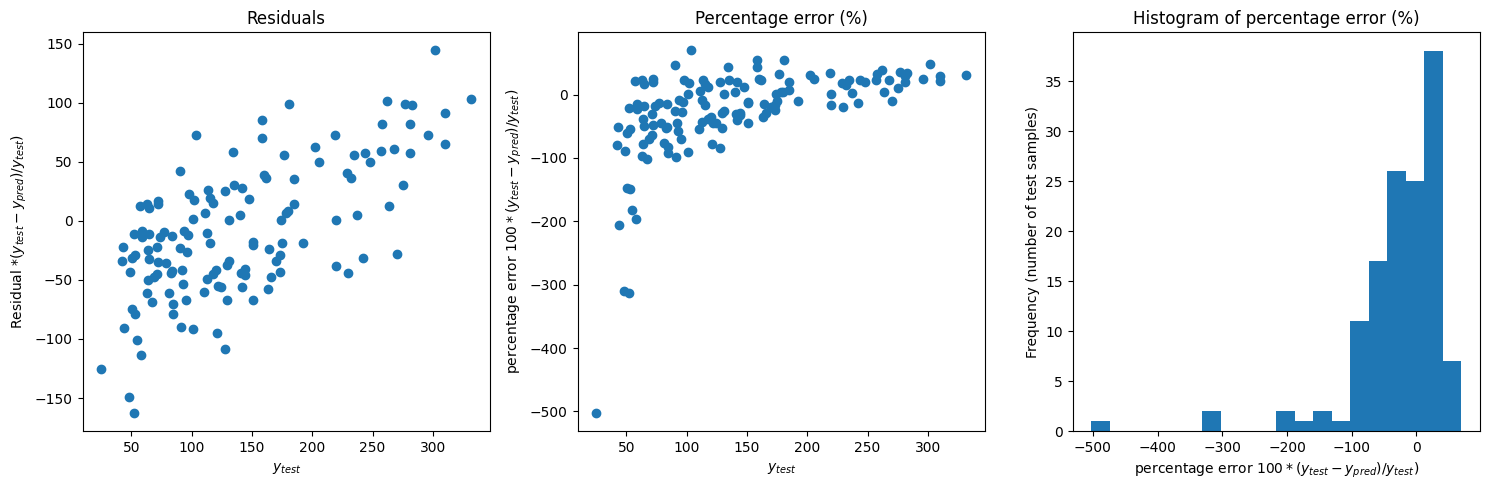

In [13]:
# Linear model evaluation
model_estimation(linearModel, y_train, y_test, y_linear_pred_train, y_linear_pred_test)

Train Dataset: Mean Absolute Error: 37.71
Train Dataset: Mean Squared Error: 2203.41
Train Dataset: Mean Absolute Percentage Error: 2203.41
Test Dataset: Mean Absolute Error: 47.55
Test Dataset: Mean Squared Error: 3554.30
Test Dataset: Mean Absolute Percentage Error: 0.47
y = -6.71 * x_0 + -25.02 * x_1 + -33.40 * x_2 + -0.47 * x_3 + -43.05 * x_4 + 52.52 * x_5 + 24.64 * x_6 + -243.34 * x_7 + -2326.71 * x_8 + -3.44 * x_9 + 0.00 * x_10 + 1.10 * x_11 + -0.03 * x_12 + 0.01 * x_13 + 0.03 * x_14 + -0.06 * x_15 + 0.04 * x_16 + 0.91 * x_17 + -0.10 * x_18 + 0.00 * x_19 + -75.05 * x_20 + 0.72 * x_21 + 0.55 * x_22 + -0.80 * x_23 + 1.30 * x_24 + 0.19 * x_25 + -29.62 * x_26 + 38.23 * x_27 + 0.41 * x_28 + 0.12 * x_29 + 0.08 * x_30 + -0.10 * x_31 + 0.08 * x_32 + 0.19 * x_33 + 0.24 * x_34 + 2.72 * x_35 + 0.13 * x_36 + 0.00 * x_37 + 0.02 * x_38 + -0.01 * x_39 + 0.00 * x_40 + 0.10 * x_41 + -0.37 * x_42 + -0.04 * x_43 + 0.20 * x_44 + -0.32 * x_45 + -0.46 * x_46 + -1.52 * x_47 + -2.05 * x_48 + 0.04 * x_49

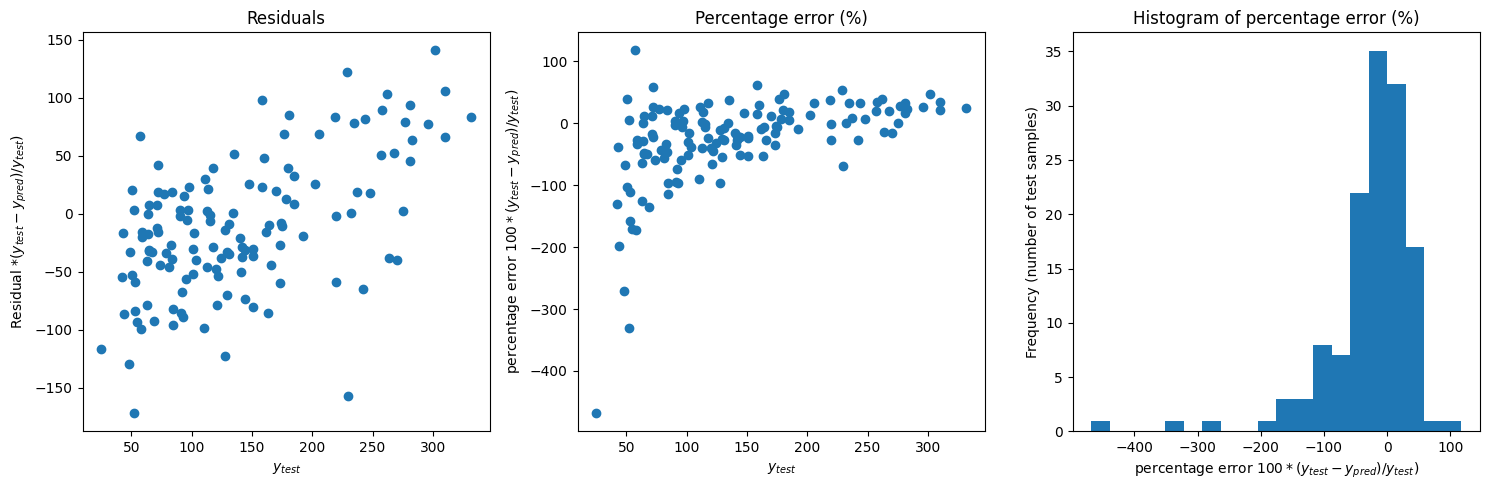

In [14]:
# Polynomial model evaluation
model_estimation(poly_reg_model, y_train, y_test, y_pred_poly_train, y_pred_poly_test)

##### Questions

##### 1. How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use poly.get_feature_names_out().

In [15]:
poly_features.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

In [16]:
X_train.shape

(309, 10)

In [17]:
X_poly_train.shape

(309, 65)

There are 10 parameters of linear regression model and 65 paramters available for polynomial regression model.
10 Linear regression parameters are age, sex, bmi, bp, s1, s2, s3, s4, s5, s6
65 Polynomial regression parameters are a combination of the above 10.

##### 2. Which model would you choose for deployment, and why?

MAPE for linear model is 2759.79 and the MAPE of polynomial model is 2203.41.

Linear model suit fit better than the polynomial model with less MAPE.


#### 3. What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

Residual plot graphs - Values are scattered all over the plot.

Percentage error graphs - Both graphs have a concentration on negative percentage error.

Histogram - More residuals are distributed around 0 for linear model than polynomial model.